In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [39]:
x = np.linspace(0, 1, 100)
y = np.sin(x)

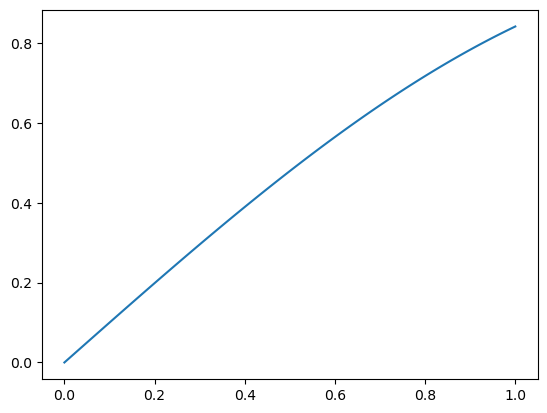

In [40]:
fig, ax = plt.subplots()
ax.plot(x, y)
plt.show()

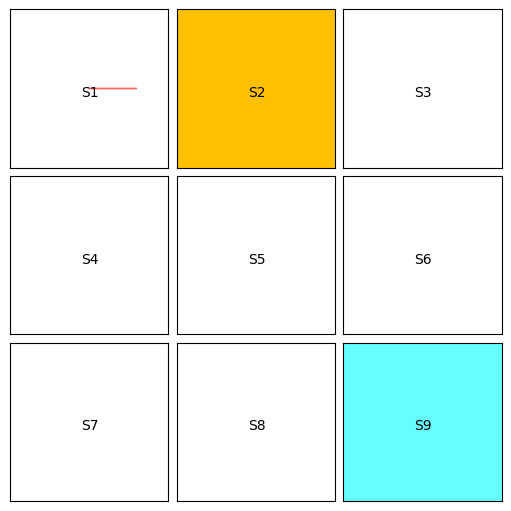

In [4]:

fig, axs = plt.subplots(3 ,3, figsize=(5, 5), layout='constrained')

# plt.subplots_adjust(wspace=0, hspace=0)

# rows: i
# columns: j
for i, ax in enumerate(axs):
    for j in range(3):
        # config axis
        ax[j].set_xlim(0, 10)
        ax[j].set_ylim(0, 10)
        ax[j].xaxis.set_visible(False)
        ax[j].yaxis.set_visible(False)

        # add state name
        ax[j].text(4.5, 4.5, "S"+str(3*i+j+1))


axs[0, 0].arrow(5, 5, 3, 0, color="red", alpha=0.6)
# axs[0, 1].set_facecolor("violet")

# obstacle: #ffc000
# destination: #66ffff
axs[0, 1].set_facecolor("#ffc000")
axs[2, 2].set_facecolor("#66ffff")


In [45]:
class gridEnv(object):
    def __init__(self, rows, columns, obs, end):
        self.rows = rows
        self.columns = columns
        self.obs = obs
        self.end = end
        self.fig, self.axs = plt.subplots(self.rows, self.columns, figsize=(5, 5), layout='constrained')

    def draw(self):
        # rows: i
        # columns: j
        for i, ax in enumerate(self.axs):
            for j in range(self.columns):
                # config axis
                ax[j].set_xlim(0, 10)
                ax[j].set_ylim(0, 10)
                ax[j].xaxis.set_visible(False)
                ax[j].yaxis.set_visible(False)

                # add state name
                ax[j].text(1, 1, "S" + str(self.columns * i + j + 1))

        # config background of obstacle and destination
        # obstacle: #ffc000
        # destination: #66ffff
        for i in self.obs:
            self.axs[self.getxy(i)].set_facecolor("#ffc000")

        self.axs[self.getxy(self.end)].set_facecolor("#66ffff")
            
    def getxy(self, id):
        return ((id - 1) // self.columns, (id - 1) % self.columns)

    def iter(self):
        self.draw()
        
        self.axs[0, 0].arrow(5, 5, 3, 0, color="red")

    def value(self, v):
        for i, ax in enumerate(self.axs):
            for j in range(self.columns):   
                ax[j].text(1, 5,  str(round(v[self.columns * i + j], 1)))

        plt.show()


[ 3.5  3.9  4.3  4.8  5.3  3.1  3.5  4.8  5.3  5.9  2.8  2.5 10.   5.9
  6.6  2.5 10.  10.  10.   7.3  2.3  9.  10.   9.   8.1]


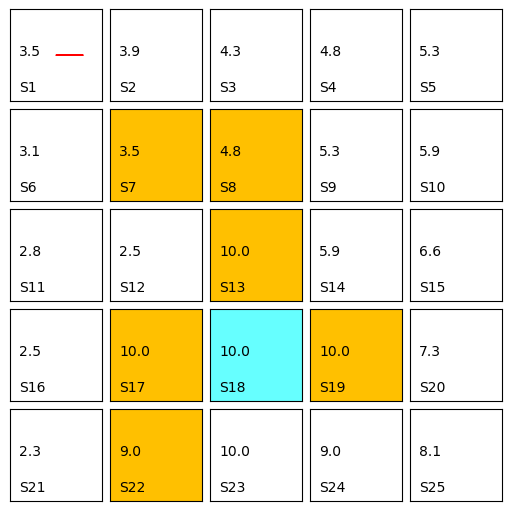

In [18]:
para = {"rows" : 5,
        "columns" : 5,
        "obs" : (7, 8, 13, 17, 19, 22),
        "end" : 18,
        "gama" : 0.9}

total_state = para["rows"] * para["columns"]

# reward matrix
r = np.array([0, 0, 0, 0, 0,
              0, 0, 0, 0, 0,
              0, 0, 1, 0, 0,
              0, 1, 1, 1, 0,
              0, 0, 1, 0, 0])

# transition matrix
p = np.zeros((total_state, total_state))
p[0, 1] = 1
p[1, 2] = 1
p[2, 3] = 1
p[3, 8] = 1
p[4, 9] = 1

p[5, 0] = 1
p[6, 1] = 1
p[7, 8] = 1
p[8, 13] = 1
p[9, 14] = 1

p[10, 5] = 1
p[11, 10] = 1
p[12, 17] = 1
p[13, 14] = 1
p[14, 19] = 1

p[15, 10] = 1
p[16, 17] = 1
p[17, 17] = 1
p[18, 17] = 1
p[19, 24] = 1

p[20, 15] = 1
p[21, 22] = 1
p[22, 17] = 1
p[23, 22] = 1
p[24, 23] = 1

v = np.linalg.inv(np.eye(total_state) - para["gama"] * p).dot(r)
v = np.round(v, 1)
print(v)

g = gridEnv(para["rows"], para["columns"], para["obs"], para["end"])
g.iter()
g.value(v)


In [71]:
def bellman_iterative_solution(r_pi, gama, transition_matrix, v_init, deta):
    v_old = v_init
    i = 0

    while True:
        i = i + 1
        v_new = r_pi + gama * np.dot(transition_matrix, v_old)

        if abs(np.all(np.absolute(v_new - v_old) < deta)):
            print(i)
            return v_new
            break
        
        # print(np.max(abs(v_new - v_old)))
        # print(v_new - v_old)
        v_old = v_new


67


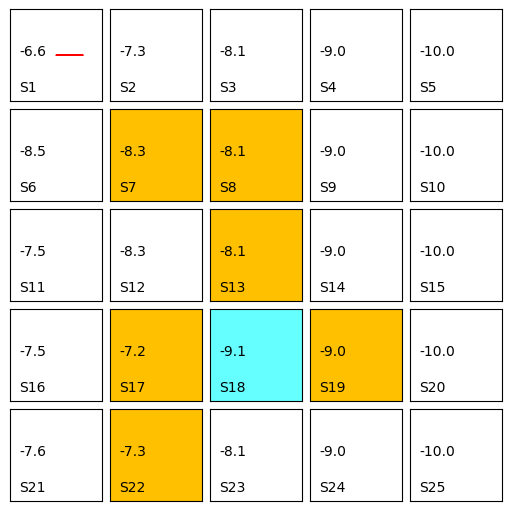

In [76]:
para = {"rows" : 5,
        "columns" : 5,
        "obs" : (7, 8, 13, 17, 19, 22),
        "end" : 18,
        "gama" : 0.9,
        "deta" : 0.001}

total_state = para["rows"] * para["columns"]

# reward matrix
r = np.array([0, 0, 0, 0,-1,
             -1,-1, 0, 0,-1,
              0,-1, 0, 0,-1,
             -1, 1,-1, 0,-1,
             -1, 0, 0, 0,-1])

# transition matrix
p = np.zeros((total_state, total_state))
p[0, 1] = 1
p[1, 2] = 1
p[2, 3] = 1
p[3, 4] = 1
p[4, 4] = 1

p[5, 6] = 1
p[6, 7] = 1
p[7, 8] = 1
p[8, 9] = 1
p[9, 9] = 1

p[10, 11] = 1
p[11, 12] = 1
p[12, 13] = 1
p[13, 14] = 1
p[14, 14] = 1

p[15, 16] = 1
p[16, 17] = 1
p[17, 18] = 1
p[18, 19] = 1
p[19, 19] = 1

p[20, 21] = 1
p[21, 22] = 1
p[22, 23] = 1
p[23, 24] = 1
p[24, 24] = 1

v_init = np.zeros(25)

g = gridEnv(para["rows"], para["columns"], para["obs"], para["end"])
g.iter()

v = bellman_iterative_solution(r, para["gama"], p, v_init, para["deta"])

# v = np.linalg.inv(np.eye(total_state) - para["gama"] * p).dot(r)
# v = np.round(v, 1)

g.value(v)